
# "Loan Prediction III. Part1. Data Exploration and Preparing" 
---
## Author Oleksandr Kursik


# 1.Define the problem

This is an data exploration [Loan Prediction III contest](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) 

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In this problem, we have to predict the Loan Status of a person based on his/ her profile.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import os;
default_path = os.getcwd()
print (default_path); # Prints the working directory
os.chdir(default_path)

* Read the data and and look at them

In [ ]:
df_train = pd.read_csv('../data/raw/train_u6lujuX_CVtuZ9i.csv', index_col=0)
df_train.shape


In [ ]:
df_train.head(10)

In [ ]:
df_train.describe()

# 2. Prepare the Data

## 2.1.Data Description



### 2.1.1 Describe the extent of the data that is available
Variable | Description
-------- | -------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status| Loan approved (Y/N)

### 2.1.2 Describe data that is not available but is desirable
Let’s check if the data has any missing values in numerical variables and separate this quantity by fields:

In [ ]:
df_train.isnull().sum()

### 2.1.3. Visualize numerical data (Distribution analysis):

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


In [ ]:
fig1 = plt.figure(figsize=(10,24))
ax1 = fig1.add_subplot(8,2,1)
df_train['ApplicantIncome'].hist(bins=50)
ax2 = fig1.add_subplot(8,2,2)
df_train.boxplot(column='ApplicantIncome')
ax3 = fig1.add_subplot(8,2,3)
df_train['CoapplicantIncome'].hist(bins=50)
ax4 = fig1.add_subplot(8,2,4)
df_train.boxplot(column='CoapplicantIncome')
ax5 = fig1.add_subplot(8,2,5)
df_train['LoanAmount'].hist(bins=50)
ax6 = fig1.add_subplot(8,2,6)
df_train.boxplot(column='LoanAmount')
ax7 = fig1.add_subplot(8,2,7)
df_train['Loan_Amount_Term'].hist(bins=50)
ax8 = fig1.add_subplot(8,2,8)
df_train.boxplot(column='Loan_Amount_Term')

In [ ]:
g = sns.PairGrid(df_train)
# g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


### 2.1.4. Categorical variable analysis: 

Gender,	Married, Dependents, Education, Self_Employed, Credit_History, Property_Area

In [ ]:
fig2 = plt.figure(figsize=(15,15))

ax1 = fig2.add_subplot(3,3,1)
gender_temp = df_train['Gender'].value_counts(ascending=True)
gender_temp.plot(kind='bar')
ax1.set_title("Gender")

ax2 = fig2.add_subplot(3,3,2)
married_temp = df_train['Married'].value_counts(ascending=True)
married_temp.plot(kind='bar')
ax2.set_title("Married")

ax3 = fig2.add_subplot(3,3,3)
dependents_temp = df_train['Dependents'].value_counts(ascending=True)
dependents_temp.plot(kind='bar')
ax3.set_title("Dependents")

ax4 = fig2.add_subplot(3,3,4)
education_temp = df_train['Education'].value_counts(ascending=True)
education_temp.plot(kind='bar')
ax4.set_title("Education")

ax5 = fig2.add_subplot(3,3,5)
self_employed_temp = df_train['Self_Employed'].value_counts(ascending=True)
self_employed_temp.plot(kind='bar')
ax5.set_title("Self_Employed")

ax6 = fig2.add_subplot(3,3,6)
credit_history_temp = df_train['Credit_History'].value_counts(ascending=True)
credit_history_temp.plot(kind='bar')
ax6.set_title("Credit_History")

ax7 = fig2.add_subplot(3,3,7)
property_area_temp = df_train['Property_Area'].value_counts(ascending=True)
property_area_temp.plot(kind='bar')
ax7.set_title("Property_Area")

In [ ]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print(temp2)

In [ ]:
fig3 = plt.figure(figsize=(8,4))
ax1 = fig3.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig3.add_subplot(1,2,2)
temp2.plot(kind = 'bar')
#ax2.set_xlabel('Credit_History')
#ax2.set_ylabel('Probability of getting loan')
#ax2.set_title("Probability of getting loan by credit history")


## 2.2 Data Processing

### 2.2.1. Make features space


In [ ]:
# recode and save outcome vector
y = df_train['Loan_Status'].map({'N': 0, 'Y': 1})
del df_train['Loan_Status']
print ('Length of outcome vector: ', len(y))


In [ ]:
df_test = pd.read_csv('../data/raw/test_Y3wMUE5_7gLdaTN.csv', index_col=0)
print('Sizes', df_train.shape, df_test.shape)


In [ ]:
# all in one dataframe
df = pd.concat([df_train, df_test])
df.shape

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)

### 2.2.2. Constructing needed functions

In [ ]:
from statistics import median, mode

def if_else(condition, a, b):
    if condition:
        return a
    else:
        return b

def make_time_features(data):
    """
    make datetime features (but not in this case)
    """
    return (data, tm)

def make_null_features(data):
    """
    replace missing value
    """
    # replace in Dependents NA -> '0'
    data['Dependents'] = data['Dependents'].fillna('0')
    
    # replace in Married NA -> "No"
    data['Married']=data['Married'].fillna('No')
    
    # replace in Gender NA -> "Male"
    data['Gender'] = data['Gender'].fillna('Male')
    
    # replace in Self_Employed NA -> "Yes" if ApplicantIncome >0 else 'No'
    data.loc[data.ApplicantIncome > 0,  'Self_Employed']= \
        data.loc[df.ApplicantIncome > 0,  'Self_Employed'].fillna('Yes')
    data.loc[data.ApplicantIncome <= 0,  'Self_Employed']= \
        data.loc[df.ApplicantIncome <= 0,  'Self_Employed'].fillna('No')
    
    # replace in Loan_Amount NA -> median(Loan_Amount)    
    data['LoanAmount']= data['LoanAmount'].fillna(median(data['LoanAmount']))
    
    # replace in Loan_Amount_Term NA -> mode(Loan_Amount_Term)    
    data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(mode(data['Loan_Amount_Term']))
    
    # replace in Credit_History NA -> "Yes"
    data['Credit_History']=data['Credit_History'].fillna(1)

    return data





def make_calc_features(data):
    """
    feature engineering 
    """
    # calculate FamilySize
    data['numDependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
    data['FamilySize'] = data.apply(lambda x: x.numDependents + 2 if x.CoapplicantIncome > 0 or x.Married == 'Yes'\
                           else x.numDependents + 1, axis =1)
    del data['numDependents']
    
    # calculate TotalIncome
    data['TotalIncome'] = data.ApplicantIncome + data.CoapplicantIncome
    
    # calculate TotalIncomePerson
    data['TotalIncomePerson'] = data.TotalIncome / data.FamilySize
    
    # calculate DTI
    data['DTI'] = data.LoanAmount / data.TotalIncome 
    
    # calculate DTI by person
    data['DTI_person'] = data.LoanAmount / (data.TotalIncome / data.FamilySize)
    
    # calculate LoanAmountMonth monthly
    data['LoanAmountMonth'] = data.LoanAmount / data.Loan_Amount_Term
    
    # calculate DTI_month
    data['DTI_month'] = data.LoanAmountMonth / data.TotalIncome 
    
    # calculate DTI_month by person
    data['DTI_month_person'] = data.LoanAmountMonth / (data.TotalIncome / data.FamilySize)
        
    return data
    
    

log_features = ['LOG_ApplicantIncome',
                'LOG_CoapplicantIncome',
                'LOG_LoanAmount',
                'LOG_Loan_Amount_Term',
                'LOG_TotalIncome',
                'LOG_TotalIncomePerson',
                'LOG_LoanAmountMonth',
                'LOG_DTI',
                'LOG_DTI_person',
                'LOG_DTI_month',
                'LOG_DTI_month_person'   
               ]

def make_logs(data, log_features):
    """
    log(features)
    """
    for name in log_features:
        data[name] = np.log(data[name[4:]].abs() + 1)  # 'LOG_' +

    return data

def make_str_features(data):
    """
    recode string features to numeric
    """
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
    data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
    data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
    data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
    data['Property_Area'] = data['Property_Area'].map({'Urban': 1, 'Semiurban': 2, 'Rural': 3})

    return data

### 2.2.3. Check missing values in the dataset

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
#replace NA 
df= make_null_features(df)
df.isnull().sum()

### 2.2.4. Make calculated features

In [ ]:
df = make_calc_features(df)

In [ ]:
df.head(10)

### 2.2.5. Make log features

In [ ]:
df = make_logs(df, log_features)


### 2.2.5. Make string features (as numeric)

In [ ]:
df = make_str_features(df)

In [ ]:
# check NA
df.apply(lambda x: sum(x.isnull()),axis=0)

## 2.3. Divide data on train and test again and save

In [ ]:
data_train = df[df.index.isin(df_train.index)]
data_test = df[df.index.isin(df_test.index)]
print(data_train.shape, data_test.shape)

data_tmp = data_train.copy()
data_tmp['y'] = y


data_tmp.to_csv('../data/processed/train_ready.csv', index=False)
data_test.to_csv('../data/processed/test_ready.csv', index=False)

In [ ]:
data_tmp.info()

In [ ]:
def get_features_and_labels(frame):
    '''
    Transforms and scales the input data and returns numpy arrays for
    training and testing inputs and targets.
    '''

    # Replace missing values with 0.0, or we can use
    # scikit-learn to calculate missing values (below)
    #frame[frame.isnull()] = 0.0

    # Convert values to floats
    arr = np.array(frame, dtype=np.float)

    # Use the last column as the target value
    X, y = arr[:, :-1], arr[:, -1]
    # To use the first column instead, change the index value
    #X, y = arr[:, 1:], arr[:, 0]
    
    # Use 80% of the data for training; test against the rest
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # sklearn.pipeline.make_pipeline could also be used to chain 
    # processing and classification into a black box, but here we do
    # them separately.
    
    # If values are missing we could impute them from the training data
    #from sklearn.preprocessing import Imputer
    #imputer = Imputer(strategy='mean')
    #imputer.fit(X_train)
    #X_train = imputer.transform(X_train)
    #X_test = imputer.transform(X_test)
    
    # Normalize the attribute values to mean=0 and variance=1
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # To scale to a specified range, use MinMaxScaler
    #from sklearn.preprocessing import MinMaxScaler
    #scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit the scaler based on the training data, then apply the same
    # scaling to both training and test sets.
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Return the training and test sets
    return X_train, X_test, y_train, y_test


trainSet, testSet, y_train, y_test = get_features_and_labels (data_tmp )


# 3. Building a Predictive Models

## 3.1.

Evaluating classifiers
[0.77083333 0.86213235 0.66239316 0.70495495 0.72068966 0.57647059
 0.63921569 0.78627451 0.92117117 0.67094017]
LR: ROC_AUC on CV 0.731508 (0.099701) ; ROC_AUC on testSet: 0.689028 
[0.85737179 0.671875   0.65384615 0.70833333 0.87327586 0.7872549
 0.73137255 0.73823529 0.86824324 0.70619658]
RF: ROC_AUC on CV 0.759600 (0.077886) ; ROC_AUC on testSet: 0.655321 
Plotting the results


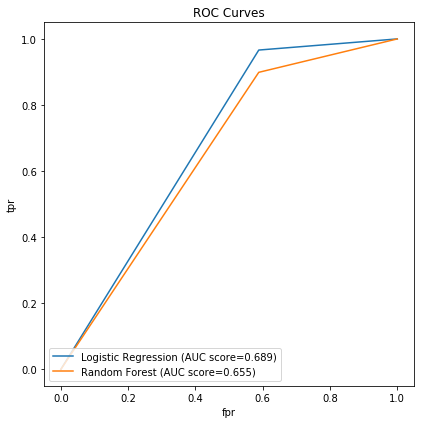

In [128]:
def evaluate_classifier(X_train, X_test, y_train, y_test):
    '''
    Run multiple times with different classifiers to get an idea of the
    relative performance of each configuration.

    Returns a sequence of tuples containing:
        (title, precision, recall)
    for each learner.
    '''

    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    
    # Import some classifiers to test
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier

    # We will calculate the P-R curve for each classifier
    from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
    
    #
   
    results = []  
    names=[]
    models = []
    seed = 7
    
    scoring = 'roc_auc'
    #scoring = {'acc': 'accuracy','AUC': 'roc_auc'}
    
    kfold = KFold(n_splits=10, random_state=seed)
    
    # Here we create classifiers with default parameters. These need
    # to be adjusted to obtain optimal performance on your data set.
    
    # Test the logistoc regression classifier
    model = LogisticRegression ()
    name='LR'
    # Fit the classifier
    model.fit(X_train, y_train)
    
    #Cross validation result   
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    print(cv_results)

    
    results.append(cv_results)  
    names.append(name)
   
     
    #Result on testSet 
    #calculate ROC_AUC
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    # Generate the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
      
    msg = "%s: %s %f (%f) %s: %f " % (name, "ROC_AUC on CV", cv_results.mean(), cv_results.std(),"; ROC_AUC on testSet", auc_score)
    print(msg)
    # Include the score in the title
    yield 'Logistic Regression (AUC score={:.3f})'.format(auc_score), fpr, tpr

    

    # Test the logistoc regression classifier
    model = RandomForestClassifier(n_estimators=100)

    name='RF'
    # Fit the classifier
    model.fit(X_train, y_train)
    
    #Cross validation result   
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    print(cv_results)

    
    results.append(cv_results)  
    names.append(name)
   
     
    #Result on testSet 
    #calculate ROC_AUC
    auc_score = roc_auc_score(y_test, model.predict(X_test))
    # Generate the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
      
    msg = "%s: %s %f (%f) %s: %f " % (name, "ROC_AUC on CV", cv_results.mean(), cv_results.std(),"; ROC_AUC on testSet", auc_score)
    print(msg)
    # Include the score in the title
    yield 'Random Forest (AUC score={:.3f})'.format(auc_score), fpr, tpr

#     # Include the score in the title
#     yield 'Random Forest (F1 score={:.3f})'.format(score), precision, recall, accuracy_score

    # =====================================================================

    
    
    
def plot(results):
    '''
    Create a plot comparing multiple learners.

    `results` is a list of tuples containing:
        (title, fpr, tpr)
    
    All the elements in results will be plotted.
    '''

    # Plot the ROC curves

    fig = plt.figure(figsize=(6, 6))
    fig.canvas.set_window_title('Classifying data')

    for label, fpr, tpr in results:
        plt.plot(fpr, tpr, label=label)

    plt.title('ROC Curves')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend(loc='lower left')

    # Let matplotlib improve the layout
    plt.tight_layout()

    # ==================================
    # Display the plot in interactive UI
    plt.show()

    # To save the plot to an image file, use savefig()
    #plt.savefig('plot.png')

    # Open the image file with the default image viewer
    #import subprocess
    #subprocess.Popen('plot.png', shell=True)

    # To save the plot to an image in memory, use BytesIO and savefig()
    # This can then be written to any stream-like object, such as a
    # file or HTTP response.
    #from io import BytesIO
    #img_stream = BytesIO()
    #plt.savefig(img_stream, fmt='png')
    #img_bytes = img_stream.getvalue()
    #print('Image is {} bytes - {!r}'.format(len(img_bytes), img_bytes[:8] + b'...'))

    # Closing the figure allows matplotlib to release the memory used.
    plt.close()

    
    
    
    
# Evaluate multiple classifiers on the data
print("Evaluating classifiers")
results = list(evaluate_classifier(trainSet, testSet, y_train, y_test))

# Display the results
print("Plotting the results")
plot(results)
    
    
 

